# Data Preprocessing

Il dataset, prima di tutto, va opportunamente elaborato per occuparsi di eventuali dati duplicati o mancanti. Inoltre dovremo separare i dati per ottenere un training e un test set.
Gli step che seguiremo saranno i seguenti:
1. Caricare i dati
2. Gestire i dati mancanti
3. Eliminare le features ridondanti
4. Dividere il dataset in training e test set
5. Normalizzare e standardizzare i dati

## Caricamento dei dati

Tramite `pandas` e il dataset fornito in .csv, carichiamo i dati all'interno di un dataset.

In [158]:
import pandas as pd
import numpy as np

weather_df = pd.read_csv('weather_dataset.csv', sep=',')  # Loading the dataset in a Pandas Dataframe
weather_df

,wind_speed,wind_direction,temperature,dew_point,air_pressure
0,60,260,35,32,10185
1,60,260,36,33,10183
2,60,260,37,34,10181
3,50,260,38,35,10174
4,50,260,39,36,10169
...,...,...,...,...,...
70123,60,250,86,63,10301
70124,50,250,82,65,10299
70125,60,240,82,63,10291
70126,60,250,81,61,10286


## Gestione dei dati mancanti

Con un `for-each` controlliamo, per ogni colonna, quanti sono i valori mancanti.

In [159]:
for column in weather_df.columns:
  number_of_nans_in_column = weather_df[column].isnull().sum()  # Per ogni colonna, somma il numero dei valori che sono null
  print(f"{column} -> {number_of_nans_in_column} missing values")

wind_speed -> 0 missing values
wind_direction -> 0 missing values
temperature -> 0 missing values
dew_point -> 0 missing values
air_pressure -> 0 missing values


Non essendoci valori nulli, procediamo direttamente con la prossima fase.

## Eliminazione di evenutali feature ridondanti

Si mettono in `correlazione` a due a due le feature, e in caso si eliminano feature ridondanti

<AxesSubplot:>

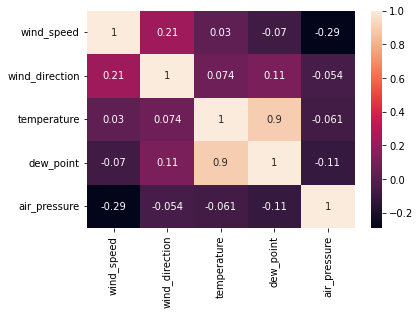

In [160]:
import seaborn as sns

correlations = weather_df.corr() # Calculating the correlations between the columns of the dataset 
sns.heatmap(correlations, annot = True)  # Displaying them in a heatmap

La temperatura e il punto di rugiada hanno una correlazione molto alta, pari a **0.9**.

Questa relazione è attribuibile alla relazione che le due feature hanno: il punto di rugiada è infatti calcolato sulla base della temperatura e dell'umidità relativa in un certo momento.
Visto che dobbiamo fare predizioni sulla temperatura, decidiamo di eliminare la feature "dew_points".

<img width="350" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Dewpoint-RH.svg/800px-Dewpoint-RH.svg.png" 
    alt="grafico_temperatura_rugiada_wikipedia" />

In [161]:
print(list(weather_df.columns))
weather_df = weather_df.drop(columns=['dew_point'])
print(list(weather_df.columns))

['wind_speed', 'wind_direction', 'temperature', 'dew_point', 'air_pressure']
['wind_speed', 'wind_direction', 'temperature', 'air_pressure']


## Divisione del data set in training e test set

Si vuole dividere il data set in 3 parti:
1. Training set, comprendente tutte le righe tranne le ultime 168
2. Test set, comprendente solo le ultime 168 righe

In [162]:
training_set = weather_df[:-168]
test_set = weather_df[-168:]

### VALUTARE SE METTERE O NO PERCHÈ SPEZZA SERIE DI TEMPO -> SECONDO ME NO MA VEDIAMO COSA ESCE FUORI
Per evitare il problema dell'overfitting si vuole dividere il training set in 2 parti a sua volta:
1. Training set, contente l'80% dell'iniziale Training set
2. Validation set, contente il restante 20% dell'iniziale Training set

In [163]:
# from sklearn.model_selection import train_test_split

# training_set, validation_set = train_test_split(training_set, test_size=0.2)

# print(f"The training set is:\n{training_set}\n")
# print(f"The testing set is:\n{validation_set}\n")

## Standardizzazione e normalizzazione dei dati

Per `facilitare la fase di apprendimento` si scalano i dati del dataset.

In [164]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

training_set_scaled = standard_scaler.fit_transform(training_set)
test_set_scaled = standard_scaler.transform(test_set)

print(f"First 10 values in training set before are:\n{training_set.head(10)}\nafter they are:\n{training_set_scaled[:10]}")
print(f"First 10 values in testing set before are:\n{test_set.head(10)}\nafter they are:\n{test_set_scaled[:10]}")

First 10 values in training set before are:
   wind_speed  wind_direction  temperature  air_pressure
0          60             260           35         10185
1          60             260           36         10183
2          60             260           37         10181
3          50             260           38         10174
4          50             260           39         10169
5          60             260           43         10165
6          60             300           44         10171
7          40             290           40         10174
8          40             300           37         10179
9          30             290           40         10181
after they are:
[[ 0.8001791   0.80484909 -0.97017729  0.34613392]
 [ 0.8001791   0.80484909 -0.95547013  0.32548664]
 [ 0.8001791   0.80484909 -0.94076297  0.30483935]
 [ 0.37388489  0.80484909 -0.92605581  0.23257385]
 [ 0.37388489  0.80484909 -0.91134865  0.18095564]
 [ 0.8001791   0.80484909 -0.85252001  0.13966106]
 [ 0.80

Per dividere il traning e test set in input e output, ogni n_steps righe, se salviamo una. Quest'ultima sarebbe la label, che sarà quella da predire

In [165]:
def split_sequence(sequence, n_steps):
    x, y = list(), list()

    for i in range(len(sequence)):
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break

        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]  # Ogni n_step volte, salva la riga dopo come l'informazione che il modello dovrà predire
        x.append(seq_x)
        y.append(seq_y)

    return x,y

n_steps = 20
train_x, train_y = split_sequence(training_set_scaled, n_steps)
test_x, test_y = split_sequence(test_set_scaled, n_steps)

# print(f"First 10 values in training set before are:\n{train_x[:10]}\nafter they are:\n{train_y[:10]}")
# print(f"First 10 values in testing set before are:\n{test_x[:10]}\nafter they are:\n{test_y[:10]}")

Definiamo il modello di CNN che andremo ad utilizzare.
I valori dei layer nascosti sono stati scelti dopo vari tentativi.

Abbiamo deciso di usare batch_size = 1 per questione di output: se avessimo scelto, ad esempio batch_size = 7, avremo avuto problemi con le predizione nella fase di "Walk Forward Validation", ovvero nella fase di predizione della temperatura partendo dalle predizione precedenti. Secondo noi il batch_size dovrebbe poter essere diverso da 1, ma in questo caso non siamo riusciti a utilizzare un numero diverso.

In [166]:
import torch

batch_size = 1
input_size = 20
features = 4
kernel_size = 2

hidden_dim_conv = 8
hidden_dim_lin = 10

class WeatherCNN(torch.nn.Module):
    def __init__(self):
        super(WeatherCNN, self).__init__()
        self.conv1d = torch.nn.Conv1d(input_size, hidden_dim_conv, kernel_size=kernel_size)
        self.relu = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(24, hidden_dim_lin)
        self.fc2 = torch.nn.Linear(hidden_dim_lin, features*batch_size)
        
    def forward(self,x):
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.view(-1)  # La matrice viene portata in riga
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = x.view(batch_size, -1) # Il vettore viene riportato in forma matriciale

        
        return x

Impostiamo la GPU (se possibile) come "device" e inizializziamo il modello, l'ottimizzatore e la funzione di loss.

In [167]:
import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = WeatherCNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()
device

device(type='cpu')

Inseriamo i dati nei tensori, che andanno a loro volta a far parte dei DataLoader.

In [168]:
import torch
from torch.utils.data import TensorDataset

tensor_ids_train = torch.FloatTensor(train_x)
labels_train = torch.FloatTensor(train_y)
train_dataset = TensorDataset(tensor_ids_train, labels_train)

tensor_ids_test = torch.FloatTensor(test_x)
labels_test = torch.FloatTensor(test_y)
test_dataset = TensorDataset(tensor_ids_test, labels_test)

In [169]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
valid_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

Funzioni di training e di test:

In [170]:
train_losses = []
valid_losses = []

def Train():
    running_loss = .0
    model.train()
    
    for idx, (inputs,labels) in enumerate(train_loader):
        # print('batch {}/{}'.format(idx, len(train_loader)))
        # print(num_samples)
        inputs = inputs.to(device)
        labels = labels.to(device)
        # print(inputs.shape)
        optimizer.zero_grad()
        preds = model(inputs.float())
        # print(preds, labels)
        loss = criterion(preds,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
    
    train_loss = running_loss/len(train_loader)
    train_losses.append(train_loss.detach().cpu().data.numpy())
    
    print(f'train_loss {train_loss}')
    
def Valid():
    running_loss = .0
    
    model.eval()
    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_loader):
            # print('batch {}/{}'.format(idx, len(valid_loader)))
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            preds = model(inputs.float())
            loss = criterion(preds,labels)
            running_loss += loss
            

        valid_loss = running_loss/len(valid_loader)
        valid_losses.append(valid_loss.detach().cpu().data.numpy())
        print(f'valid_loss {valid_loss}')

Codice di training e testing per le epoche

In [171]:
epochs = 13

for epoch in range(epochs):
    print('epochs {}/{}'.format(epoch+1,epochs))
    Train()
    Valid()

epochs 1/13
train_loss 0.6389366984367371
valid_loss 0.22269877791404724
epochs 2/13
train_loss 0.27118340134620667
valid_loss 0.1107565239071846
epochs 3/13
train_loss 0.19838106632232666
valid_loss 0.0772574245929718
epochs 4/13
train_loss 0.17516516149044037
valid_loss 0.06504924595355988
epochs 5/13
train_loss 0.162496879696846
valid_loss 0.059378720819950104
epochs 6/13
train_loss 0.1547466367483139
valid_loss 0.055826082825660706
epochs 7/13
train_loss 0.14997906982898712
valid_loss 0.05252564325928688
epochs 8/13
train_loss 0.14693213999271393
valid_loss 0.050086360424757004
epochs 9/13
train_loss 0.14481474459171295
valid_loss 0.04832343012094498
epochs 10/13
train_loss 0.1432274878025055
valid_loss 0.046679433435201645
epochs 11/13
train_loss 0.1419926881790161
valid_loss 0.04546147584915161
epochs 12/13
train_loss 0.14104415476322174
valid_loss 0.04458281397819519
epochs 13/13
train_loss 0.14027252793312073
valid_loss 0.04389205574989319


Il resto continua qua: [cnn-time-series-forecasting-with-pytorch ](https://www.kaggle.com/hanjoonchoe/cnn-time-series-forecasting-with-pytorch/notebook)

Qui spiega anche la roba ricorsiva che dice: [Walk Forward Validation](https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/#:~:text=2083.4539999999984%202197.006000000004-,Walk%2DForward%20Validation,-Models%20will%20be), però non l'ho ancora provata.

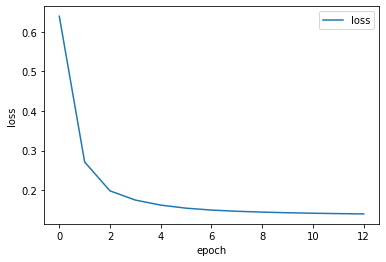

In [179]:
loss_df = pd.DataFrame(train_losses, index=list(range(len(train_losses))), columns=["loss"])

xs = loss_df.plot()
_ = xs.set_ylabel("loss")
_ = xs.set_xlabel("epoch")

https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/#:~:text=single%20model%0Adef-,evaluate_model,-(train%2C%20test%2C%20n_input

https://stackoverflow.com/questions/42703500/best-way-to-save-a-trained-model-in-pytorch#:~:text=Recommended%20approach%20for%20saving%20a%20model

In [180]:
torch.save(model.state_dict(), 'model_1batch_finale2.pth')

Valutiamo il modello tramite la ricorsione ("Walking Forward Validation")

In [185]:
from math import sqrt
from torch import nn
from array import array

evalutation_loss = nn.MSELoss()

# evaluate a single model
def evaluate_model(model, train, test, n_input):
	# fit model
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		with torch.no_grad():
			# print(torch.FloatTensor(history[-1:]))
			to_predict, real_pred = split_sequence(history, n_input)
			#print("TO_PREDICT", to_predict[-1:])
			#print("REAL_PRED", real_pred[-1:])
			yhat_sequence = model(torch.FloatTensor(to_predict[-1:])).cpu().detach().numpy().tolist()
			yhat_sequence = np.array(yhat_sequence[0])
			#print("PRED", yhat_sequence)
			#print("PRED (array)", yhat_sequence)
			#print("\n")
		# store the predictions
		predictions.append(yhat_sequence)
		#print(predictions)
		# get real observation and add to history for predicting the next week
		history.append(yhat_sequence)
	# evaluate predictions days for each week
	# print(predictions)
	# predictions = array(predictions)
	#print("TEST", test[-10:])
	#print("PREDICTION", predictions[-10:])
	return predictions

recursive_pred = evaluate_model(model, training_set_scaled, test_set_scaled, 20)

# [Link che potrebbe essere utile ](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [182]:
real_future_weather = standard_scaler.inverse_transform(test_set_scaled)
predicted_future_weather = standard_scaler.inverse_transform(recursive_pred)

In [183]:
real_future_temperature = [x[2] for x in real_future_weather]
predicted_future_temperature = [x[2] for x in predicted_future_weather]


<AxesSubplot:>

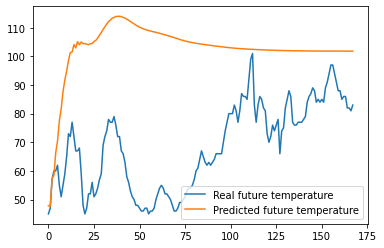

In [184]:
result = pd.DataFrame(
    {'Real future temperature':real_future_temperature, 'Predicted future temperature':predicted_future_temperature }, 
    index=list(range(len(predicted_future_weather)))
    )

result.plot()

In [178]:
result[50:]

,Real future temperature,Predicted future temperature
50,47.0,110.182225
51,46.0,109.909344
52,46.0,109.615509
53,47.0,109.394586
54,47.0,109.187457
...,...,...
163,86.0,101.822805
164,82.0,101.822423
165,82.0,101.822164
166,81.0,101.822024
